In [4]:
import os
print(os.getcwd())

C:\Users\xps\Desktop\MLProjects\ML\6.T.S. Forecasting


In [5]:
import tensorflow as tf
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(skl.__version__)
print(pd.__version__)
print(np.__version__)
#print(plt.__version__)

2.17.0
1.5.1
2.2.2
1.26.4


### Key Questions to Address:

1. What is ARIMA?
2. How is it utilized?
3. Why is it significant?
4. What is the corresponding mathematical formula?
5. How can it be implemented in Python?

---
1. **Classical Statistical Models**
**a. ARIMA (AutoRegressive Integrated Moving Average)**
- **Use Case:** Best for univariate time series with linear trends and seasonality.
- **Advantages:**
  - Works well with small datasets.
  - Handles seasonality (with SARIMA).
- **Limitations:** Assumes linear relationships and is limited to univariate series.
---
**b. Exponential Smoothing (ETS, Holt-Winters)**
- **Use Case:** Best for short-term forecasting of time series with seasonal components.
- **Advantages:**
    - Simpler to apply.
    - Performs well for smooth and seasonal data.
- **Limitations:** Doesn't handle non-linearities or large datasets well.
---

# 1. Classical Statistical Models

### a. ARIMA (AutoRegressive Integrated Moving Average) 
#### The ARIMA model is primarily **designed for univariate time series**.

**ARIMA** is a statistical model used for time series forecasting **by capturing key properties like trends, seasonality, and autocorrelation** in the data. ARIMA is a combination of three components:

- **AR (AutoRegressive)**: This component regresses the time series on its own previous values (lags).
- **I (Integrated)**: This refers to the differencing of the time series to make it stationary, i.e., removing trends and ensuring a constant mean over time.
- **MA (Moving Average)**: This component models the relationship between the residual error of a model and previous residual errors.

An ARIMA model is usually denoted by **ARIMA(p, d, q)**, where:
- **p**: The order of the autoregressive (AR) part.
- **d**: The degree of differencing (the number of times the data has been differenced to make it stationary).
- **q**: The order of the moving average (MA) part.

### ARIMA Model Formula

For a univariate time series $y_t$, the ARIMA model is given by the following equation:

$$
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t
$$

Where:
- $y_t$: The actual value at time $t$ (after differencing if required).
- $c$: Constant term (optional).
- $\phi_1, \phi_2, \dots, \phi_p$: Coefficients for the autoregressive (AR) terms.
- $\theta_1, \theta_2, \dots, \theta_q$: Coefficients for the moving average (MA) terms.
- $\epsilon_t$: The residual (error term) at time $t$.
- $\epsilon_{t-1}, \epsilon_{t-2}, \dots, \epsilon_{t-q}$: Past residuals (errors).

### Breakdown:
- **AR(p) part**: $\phi_1 y_{t-1} + \dots + \phi_p y_{t-p}$ captures the influence of previous values (lags) on the current value.
- **I(d) part**: Differencing is applied to the series $d$ times to make it stationary. If $d = 0$, no differencing is done.
- **MA(q) part**: $\theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}$ accounts for the influence of past forecast errors on the current value.

In [6]:
# Importing ther dataset
ts = pd.read_csv("luxembourg_temperature.csv", index_col='date', parse_dates=True)
ts = ts.dropna() # drop the missing values
print("The shape of the T.S. id: ", ts.shape) # shape of the T.S.
print("\n")
ts.info()

The shape of the T.S. id:  (365, 1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


##### Step 1: Check the Stationarity of the T.S.

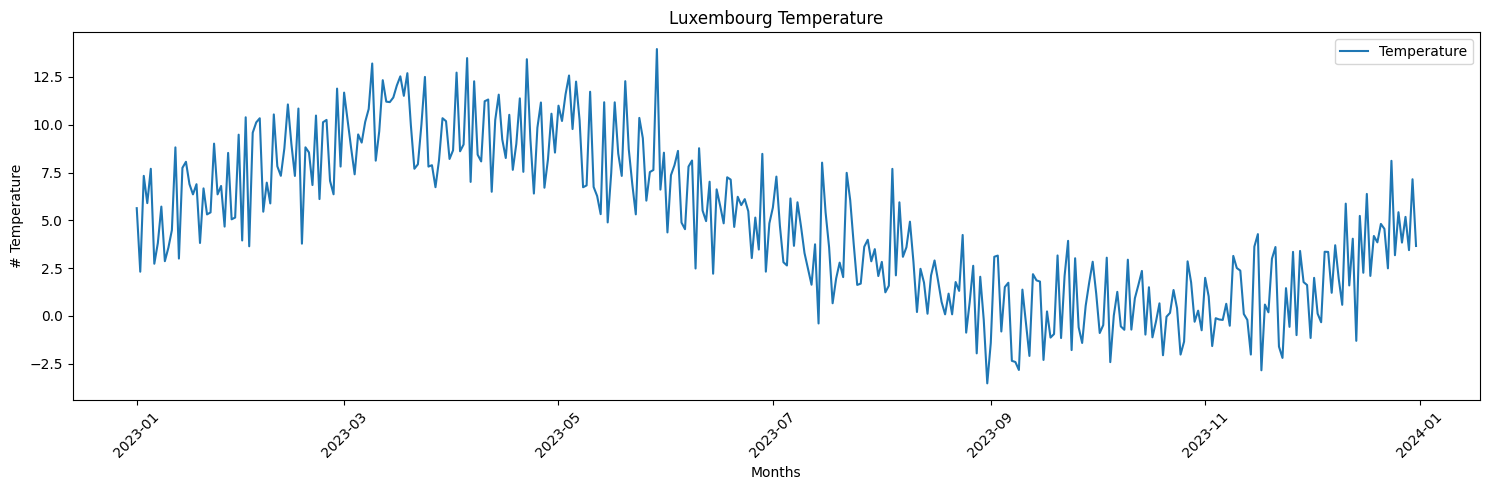

In [7]:
# 1. Visual Inspection

# Plot the time series: date vs. temperature
plt.figure(figsize=(15,5))
plt.plot(ts.index, ts['temperature'], label='Temperature')

# Adding titles and labels
plt.title("Luxembourg Temperature")
plt.xlabel("Months")
plt.ylabel("# Temperature")
plt.legend()
# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.show()

<Figure size 1500x500 with 0 Axes>

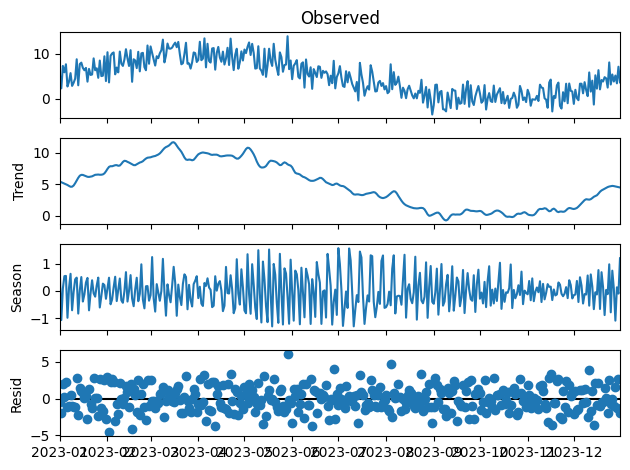

In [8]:
# 2. Decomposition:
# Separates the time series into trend, seasonal, and residual components. 
# We can use the STL (Seasonal and Trend Decomposition using Loess) method, which is robust and effective.
from statsmodels.tsa.seasonal import STL

stl = STL(ts, seasonal=13)  # Adjust seasonal parameter as needed
result = stl.fit()

# Plotting the decomposition
plt.figure(figsize=(15, 5))
result.plot()
plt.show()

In [9]:
# 2. Statistical test using Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(ts)

# Output the results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])


ADF Statistic: -0.8664585680080055
p-value: 0.7988173713156563
Critical Values: {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}


### ADF Test Results Interpretation

- **ADF Statistic**: $-0.8665$
- **p-value**: $0.7988$
- **Critical Values**:
  - $1\%$: $-3.4493$
  - $5\%$: $-2.8699$
  - $10\%$: $-2.5712$

### Conclusion

1. **p-value**:
   - The p-value ($0.7988$) is **much greater than $0.05$**. This means you **fail to reject the null hypothesis**.
   - **Interpretation**: There is insufficient evidence to suggest that the time series is stationary. Therefore, **the time series is likely non-stationary**.

2. **ADF Statistic**:
   - The ADF statistic ($-0.8665$) is **greater** (less negative) than the critical values at all significance levels ($1\%$, $5\%$, and $10\%$).
   - **This further supports the conclusion that the series is non-stationary**.

### Next Steps
Since your series is non-stationary, you may want to:

1. **Differencing**: Apply differencing to the time series to remove trends.
   $$
   \text{time\_series\_diff} = \text{time\_series.diff()}.dropna()
   $$

2. **Re-check Stationarity**: After differencing, repeat the ADF test to see if the series has become stationary.

3. **Further Transformations**: If the series is still non-stationary, consider additional transformations, such as logarithmic transformation or seasonal differencing.

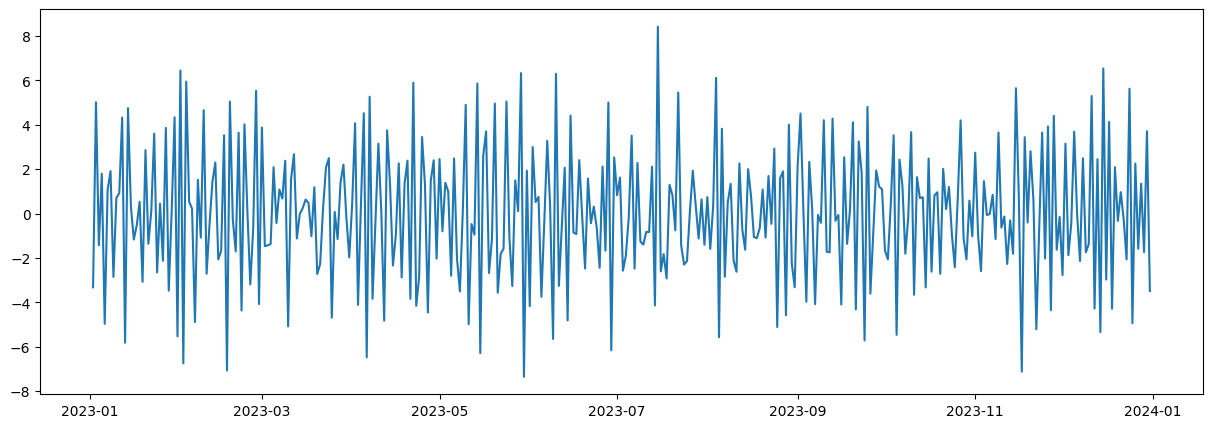

In [10]:
# 1. Differencing (Transforming the T.S. to Stationary)
ts_diff = ts.diff().dropna()
plt.figure(figsize=(15,5))
plt.plot(ts_diff)

In [11]:
# 2. Re-check Stationarity using ADF
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(ts_diff)

# Output the results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

ADF Statistic: -6.008363382690174
p-value: 1.5952987906470653e-07
Critical Values: {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}


##### Step 2: ARIMA Model Application
###### a. Generate the best parameters of the model using auto-arima

In [12]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(ts_diff['temperature'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1569.070, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1828.407, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1696.769, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1581.814, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1826.408, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1573.686, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1575.302, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1573.453, Time=0.67 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1575.061, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1571.055, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1576.601, Time=0.21 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1567.512, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1

- We can see the **best ARIMA model** seems to be of the order **(1,0,3) with the minimum AIC score=2177.241**. 
- With this knowledge we can finally proceed to train and fit the model to start making prediction!

###### b. Split Your Dataset

- Before we actually train the model, we have to split the data set into a training and testing section.
- We do this because **we first train the model on the data and keep the testing section hidden from the model**.
- Once model is ready, **we ask it to make predictions on the test data** and see how well it performs.

In [13]:
# Spliting the dataset into training set and test set
print(ts_diff.shape)
train=ts_diff.iloc[:-30]
test=ts_diff.iloc[-30:]
print(train.shape,test.shape)

(364, 1)
(334, 1) (30, 1)


- We reserving the last 30 days of the data as the testing section.
- We can see the shapes of the actual data, and the testing and training sections in the output.

###### c. Creating the ARIMA model

In [16]:
# c. Creating the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(ts_diff['temperature'],order=(1,0,3))
model=model.fit()
print(model.summary())

C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarn

                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:                  364
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -778.374
Date:                Mon, 23 Sep 2024   AIC                           1568.747
Time:                        11:08:28   BIC                           1592.130
Sample:                    01-02-2023   HQIC                          1578.041
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0303      0.048      0.625      0.532      -0.065       0.125
ar.L1          0.9894      0.014     72.826      0.000       0.963       1.016
ma.L1         -2.0310      0.055    -37.217      0.0

###### d. Check How Good The Model Is
- Here’s where our **test data** comes in.
- We first make prediction for temperature on the test data.
- Then we plot out to see how our predictions compared to the actual data.

- To actually **make predictions**, we need to use the **model.predict** function and tell it the starting and ending index in which we want to make the predictions.

C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


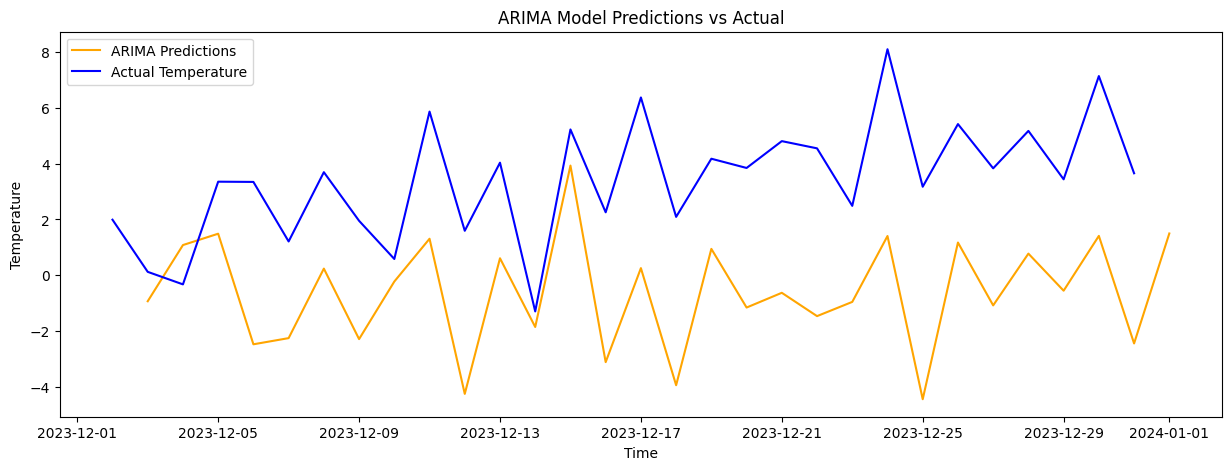

In [30]:
# Assuming 'train' and 'test' are defined and 'model' has been fitted
start = len(train)
end = len(train) + len(test) - 1

# d.Make Prediction
pred = model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(pred, label='ARIMA Predictions', color='orange')
plt.plot(test['temperature'], label='Actual Temperature', color='blue')
plt.title('ARIMA Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

###### e. Check The Accuracy Metric
- To actually ascertain how good or bad the model is we find the root mean squared error for it.

In [26]:
# e. Check The Accuracy Metric
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE, MAE, and MAPE
rmse = sqrt(mean_squared_error(test['temperature'], pred))
mae = mean_absolute_error(test['temperature'], pred)
mape = np.mean(np.abs((test['temperature'] - pred) / test['temperature'])) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box)

RMSE: 1.91
MAE: 1.51
MAPE: 1048.76%
      lb_stat  lb_pvalue
10  22.263667   0.013816


### 1. **RMSE (Root Mean Squared Error): $1.91$**
- **Interpretation**: RMSE measures the average error of the model’s predictions.
- An RMSE of $1.91$ means that, on average, the predictions deviate from the actual values by about $1.91$ units (in the same units as the data, e.g., degrees for temperature).
- **Comparison**: We can compare this value to RMSE values of other models to determine which model performs better.
- **A lower RMSE indicates a better fit**.

### 2. **MAE (Mean Absolute Error): $1.51$**
- **Interpretation**: MAE measures the average absolute errors between predicted and actual values.
- An MAE of $1.51$ indicates that, on average, the predictions differ from the actual values by $1.51$ units.
- **Comparison**: Like RMSE, **lower MAE values are preferred**.
- **MAE is often easier to interpret than RMSE because it represents the average error directly without squaring**.

### 3. **MAPE (Mean Absolute Percentage Error): $1048.76\%$**
- **Interpretation**: MAPE expresses the prediction accuracy as a percentage.
- A MAPE of $1048.76\%$ suggests that, on average, the model's predictions are off by about $1048.76\%$ of the actual values.
- **This indicates a very poor performance**, as values greater than $100\%$ mean that predictions are often larger than the actual values.
- **Concern**: **A high MAPE can indicate that the model may not be suitable for this particular dataset**, or it may imply that the model is struggling with capturing the variability of the data.

### 4. **Ljung-Box Test Results:**
- **lb_stat ($22.26$)**: This statistic tests the null hypothesis that the residuals are independently distributed (i.e., no autocorrelation).
- **A higher value typically indicates evidence against the null hypothesis**.
- **lb_pvalue ($0.0138$)**: The p-value associated with the Ljung-Box statistic.
- A p-value of $0.0138$ is less than the common significance level of $0.05$, suggesting that you can reject the null hypothesis. This implies that there is significant autocorrelation in the residuals, indicating that the model may not have adequately captured all patterns in the data.


# ARIMA Model Using Class and functions

The shape of the Time Series is:  (365, 1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


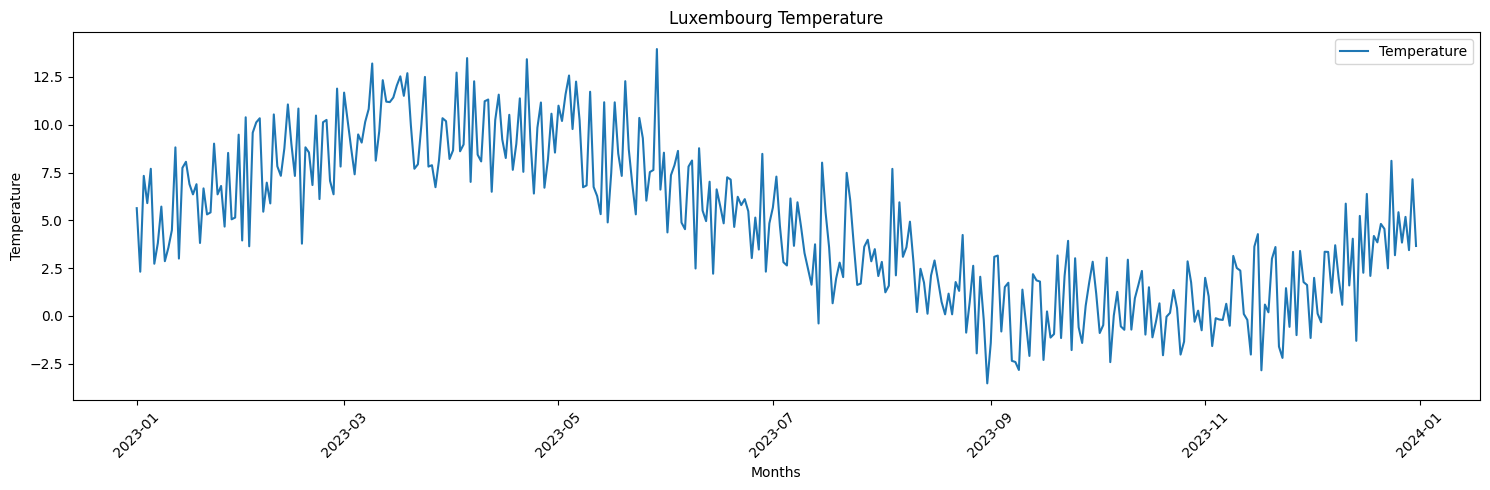

Performing ADF Test for Original Time Series:
ADF Statistic: -0.8664585680080055
p-value: 0.7988173713156563
Critical Values: {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}


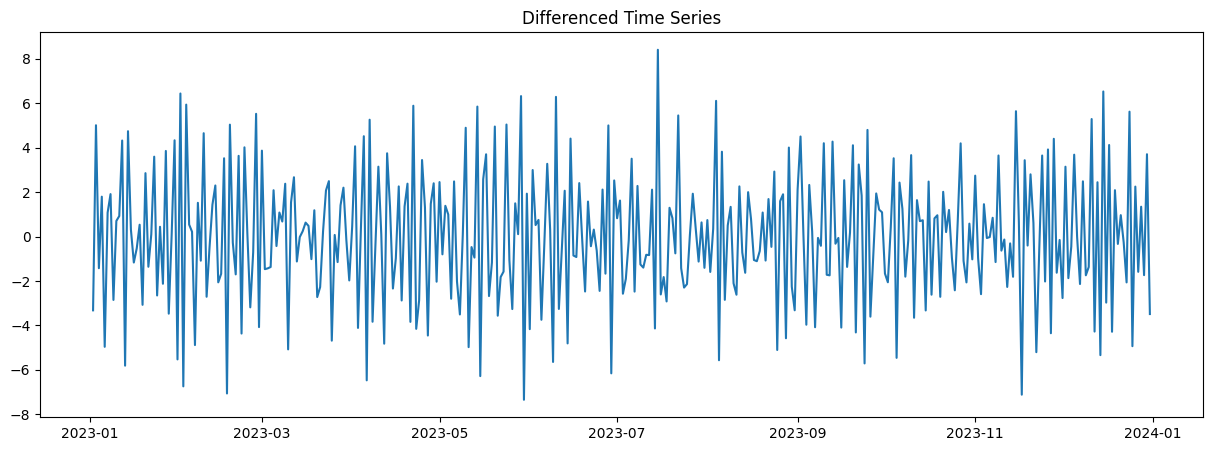

Performing ADF Test for Differenced Time Series:
ADF Statistic: -6.008363382690174
p-value: 1.5952987906470653e-07
Critical Values: {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1569.070, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1828.407, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1696.769, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1581.814, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1826.408, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1573.686, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1575.302, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1573.453, Time=0.74 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1575.061, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1571.055, Time=0.59 sec
 ARIMA(3,0,1)(0,0,0)[

C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarn

                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:                  364
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -778.374
Date:                Mon, 23 Sep 2024   AIC                           1568.747
Time:                        17:35:07   BIC                           1592.130
Sample:                    01-02-2023   HQIC                          1578.041
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0303      0.048      0.625      0.532      -0.065       0.125
ar.L1          0.9894      0.014     72.826      0.000       0.963       1.016
ma.L1         -2.0310      0.055    -37.217      0.0

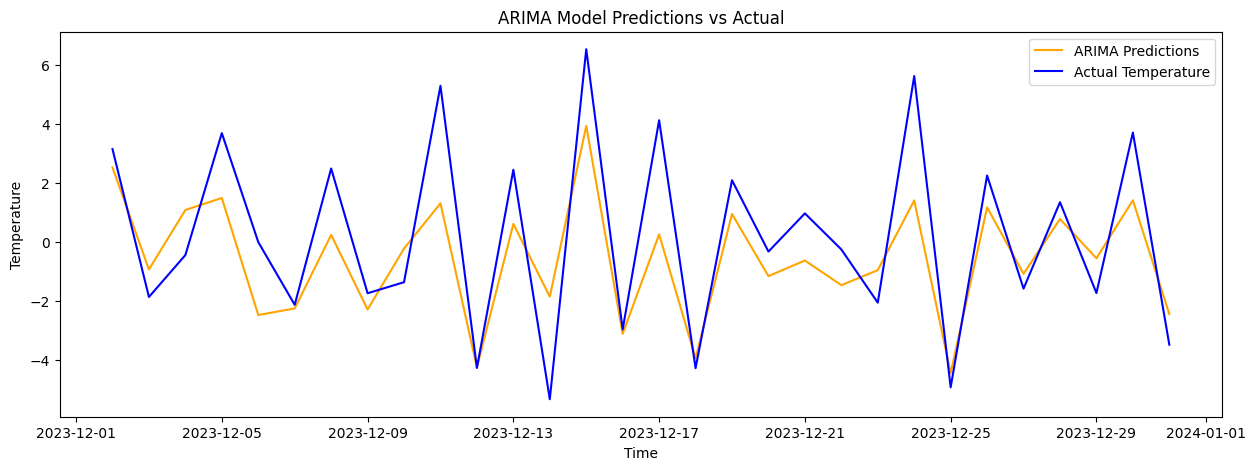

RMSE: 1.91
MAE: 1.51
MAPE: 1048.76%
      lb_stat  lb_pvalue
10  22.263667   0.013816


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.stats.diagnostic import acorr_ljungbox

class TimeSeriesAnalysis:
    def __init__(self, file_path):
        # Load the dataset
        self.ts = pd.read_csv(file_path, index_col='date', parse_dates=True)
        self.ts = self.ts.dropna()  # Drop missing values

    def data_summary(self):
        # Print the shape and info of the dataset
        print("The shape of the Time Series is: ", self.ts.shape)
        print("\n")
        self.ts.info()

    def plot_time_series(self):
        # Plot the time series data
        plt.figure(figsize=(15, 5))
        plt.plot(self.ts.index, self.ts['temperature'], label='Temperature')
        plt.title("Luxembourg Temperature")
        plt.xlabel("Months")
        plt.ylabel("Temperature")
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def adf_test(self, series, description):
        # Perform Augmented Dickey-Fuller test to check stationarity
        print(f"Performing ADF Test for {description}:")
        adf_result = adfuller(series)
        print('ADF Statistic:', adf_result[0])
        print('p-value:', adf_result[1])
        print('Critical Values:', adf_result[4])
        return adf_result[1]

    def difference_series(self):
        # Differencing to make the series stationary
        self.ts_diff = self.ts.diff().dropna()
        return self.ts_diff

    def plot_difference_series(self):
        # Plot the differenced series
        plt.figure(figsize=(15, 5))
        plt.plot(self.ts_diff)
        plt.title("Differenced Time Series")
        plt.show()

    def train_test_split(self, train_size):
        # Split the dataset into training and test sets
        train = self.ts_diff.iloc[:-train_size]
        test = self.ts_diff.iloc[-train_size:]
        return train, test

    def auto_arima_model(self):
        # Use auto-arima to find the best ARIMA model parameters
        stepwise_fit = auto_arima(self.ts_diff['temperature'], trace=True, suppress_warnings=True)
        return stepwise_fit

    def fit_arima(self, order):
        # Fit an ARIMA model based on the provided order
        model = ARIMA(self.ts_diff['temperature'], order=order)
        self.model_fit = model.fit()
        print(self.model_fit.summary())
        return self.model_fit

    def predict(self, train, test):
        # Generate predictions using the fitted ARIMA model
        start = len(train)
        end = len(train) + len(test) - 1
        pred = self.model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
        return pred

    def plot_predictions(self, pred, test):
        # Plot the ARIMA predictions vs actual values
        plt.figure(figsize=(15, 5))
        plt.plot(pred, label='ARIMA Predictions', color='orange')
        plt.plot(test['temperature'], label='Actual Temperature', color='blue')
        plt.title('ARIMA Model Predictions vs Actual')
        plt.xlabel('Time')
        plt.ylabel('Temperature')
        plt.legend()
        plt.show()

    def calculate_metrics(self, pred, test):
        # Calculate RMSE, MAE, and MAPE for the model
        rmse = sqrt(mean_squared_error(test['temperature'], pred))
        mae = mean_absolute_error(test['temperature'], pred)
        mape = np.mean(np.abs((test['temperature'] - pred) / test['temperature'])) * 100

        print(f"RMSE: {rmse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"MAPE: {mape:.2f}%")
        return rmse, mae, mape

    def ljung_box_test(self, residuals):
        # Perform Ljung-Box test for residual autocorrelation
        ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
        print(ljung_box)

# Example Usage:
file_path = "luxembourg_temperature.csv"
tsa = TimeSeriesAnalysis(file_path)

# Data Summary and Plot
tsa.data_summary()
tsa.plot_time_series()

# ADF Test Before Differencing
tsa.adf_test(tsa.ts['temperature'], 'Original Time Series')

# Differencing the Series
tsa.difference_series()
tsa.plot_difference_series()

# ADF Test After Differencing
tsa.adf_test(tsa.ts_diff['temperature'], 'Differenced Time Series')

# Train-Test Split
train, test = tsa.train_test_split(train_size=30)

# Auto ARIMA for Best Parameters (optional)
tsa.auto_arima_model()

# Fit ARIMA Model
tsa.fit_arima(order=(1, 0, 3))

# Predict and Plot
pred = tsa.predict(train, test)
tsa.plot_predictions(pred, test)

# Evaluation Metrics
tsa.calculate_metrics(pred, test)

# Residuals and Ljung-Box Test (if needed)
residuals = test['temperature'] - pred
tsa.ljung_box_test(residuals)

### b. Exponential Smoothing (ETS, Holt-Winters)

#### Key Questions to Address:

1. What is Exponential Smoothing (ETS, Holt-Winters)?
2. How is it utilized?
3. Why is it significant?
4. What is the corresponding mathematical formula?
5. How can it be implemented in Python?

### 1. What is Exponential Smoothing (ETS, Holt-Winters)?

- The **Exponential Smoothing (ETS)** is a forecasting technique where past observations are assigned exponentially decreasing weights. The most recent data points are given more importance. 
- The **Holt-Winters method** extends ETS by adding components for both **trend** and **seasonality**, making it suitable for time series that exhibit such patterns.

---

### 2. How is it Utilized?

Exponential smoothing is used to:
- **Forecast future values** based on historical data.
- Analyze time series data for **trends and seasonality**.
- Short-term forecasting in fields like finance, sales, and demand forecasting.

Steps:
1. Identify the **trend** and **seasonality** in the data.
2. Choose between **additive** or **multiplicative** ETS models:
   - **Additive**: Used when seasonal fluctuations are roughly constant.
   - **Multiplicative**: Used when seasonal variations increase or decrease proportionally with the level of the time series.
3. Fit the model to the historical data and generate forecasts.
4. Use **accuracy metrics** to evaluate the model's performance.

---

### 3. Why is it Significant?

- **Simplicity**: ETS models are computationally efficient and relatively simple to implement.
- **Adaptability**: Exponential smoothing adapts quickly to recent changes in trends.
- **Versatility**: The Holt-Winters method can handle time series with both **trends** and **seasonal patterns**.

---

### 4. What is the Corresponding Mathematical Formula?

#### Simple Exponential Smoothing (SES):
The formula for **Simple Exponential Smoothing** is:

$$
S_t = \alpha X_t + (1 - \alpha) S_{t-1}
$$

Where:
- $S_t$ is the smoothed value at time $t$,
- $X_t$ is the actual value at time $t$,
- $\alpha$ is the smoothing factor $(0 < \alpha < 1)$.

#### Holt’s Linear Trend:
Holt’s method extends SES by incorporating a **trend** component:

$$
S_t = \alpha X_t + (1 - \alpha) (S_{t-1} + T_{t-1})
$$
$$
T_t = \beta (S_t - S_{t-1}) + (1 - \beta) T_{t-1}
$$

Where:
- $S_t$ is the level at time $t$,
- $T_t$ is the trend at time $t$,
- $\alpha$ and $\beta$ are smoothing factors for the level and trend, respectively.

#### Holt-Winters Seasonal Method:
For **additive seasonality**, the Holt-Winters method extends the formula to include a seasonal component:

$$
S_t = \alpha (X_t - S_{t-L}) + (1 - \alpha) (S_{t-1} + T_{t-1})
$$
$$
T_t = \beta (S_t - S_{t-1}) + (1 - \beta) T_{t-1}
$$
$$
S_t = \gamma (X_t - S_{t-L}) + (1 - \gamma) S_{t-L}
$$

Where:
- $S_t$ is the smoothed value at time \( t \),
- $L$ is the seasonal period,
- $\alpha$, $\beta$, and $\gamma$ are smoothing factors for level, trend, and seasonality.

For **multiplicative seasonality**, the seasonal factor is multiplied instead of added.

In [36]:
# Import packages
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [44]:
# Importing ther dataset
ts = pd.read_csv("luxembourg_temperature.csv", index_col='date', parse_dates=True)

# Check for missing values in the data
print("Missing values: ",ts.isnull().sum())
# 1. Forward fill (propagating the last valid observation forward)
ts.ffill(inplace=True)

print("The shape of the T.S. id: ", ts.shape) # shape of the T.S.

Missing values:  temperature    0
dtype: int64
The shape of the T.S. id:  (365, 1)


### Step 1: Check the Stationarity of the T.S.
###### Exponential Smoothing models (ETS, Holt-Winters) are flexible and do not strictly require stationarity

### Step 2: ExponentialSmoothing Model Application

In [56]:
# Spliting the dataset into training set and test set
print(ts.shape)
train=ts.iloc[:-30]
test=ts.iloc[-30:]
print(train.shape,test.shape)

(365, 1)
(335, 1) (30, 1)


##### a. Simple Exponential Smoothing (SES)
###### For datasets without trends or seasonality, you can apply Simple Exponential Smoothing:

C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


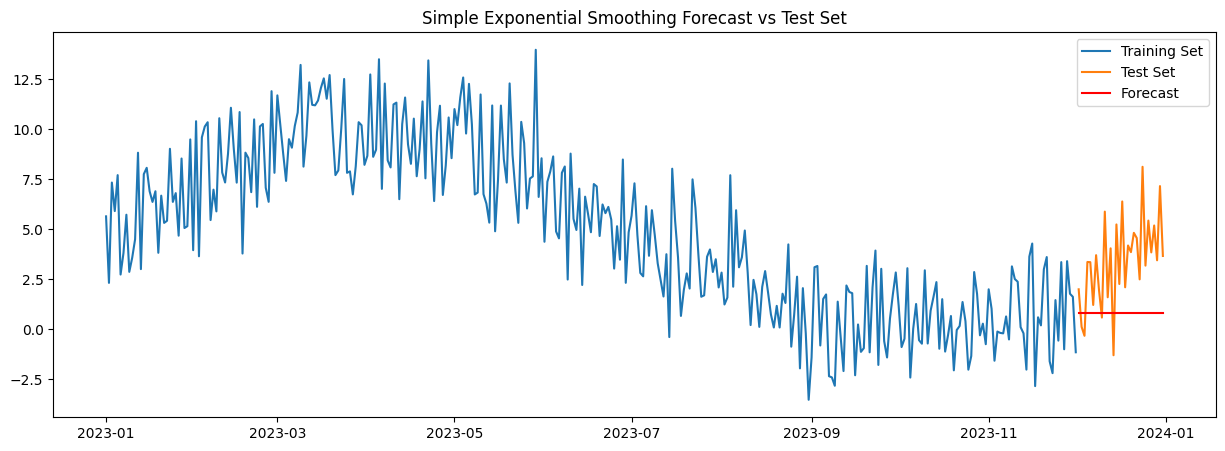

In [64]:
# Initialize and fit the model
model_ses = SimpleExpSmoothing(train)
model_ses = model_ses.fit(smoothing_level=0.2, optimized=False)

# Forecast future values
forecast_ses = model_ses.forecast(steps=len(test))

# Plot the observed and forecasted values
plt.figure(figsize=(15,5))
plt.plot(train, label='Training Set')
plt.plot(test, label='Test Set')
plt.plot(forecast_ses, label='Forecast', color='red')
plt.title('Simple Exponential Smoothing Forecast vs Test Set')
plt.legend()
plt.show()


### Note:
##### If you're using SES and **getting a straight line in the forecast**, this behavior is expected because SES smooths the data and forecasts a constant level.
##### ***If the data has trends or seasonality, SES won't capture them, and that's why you're seeing the flat line**.

### b. Holt’s Linear Trend Model
##### If the data has a trend but no seasonality, you can use Holt’s linear model.

C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\xps\AppData\Local\Temp\ipykernel_6148\2537536312.py:3: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = model_holt.fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)


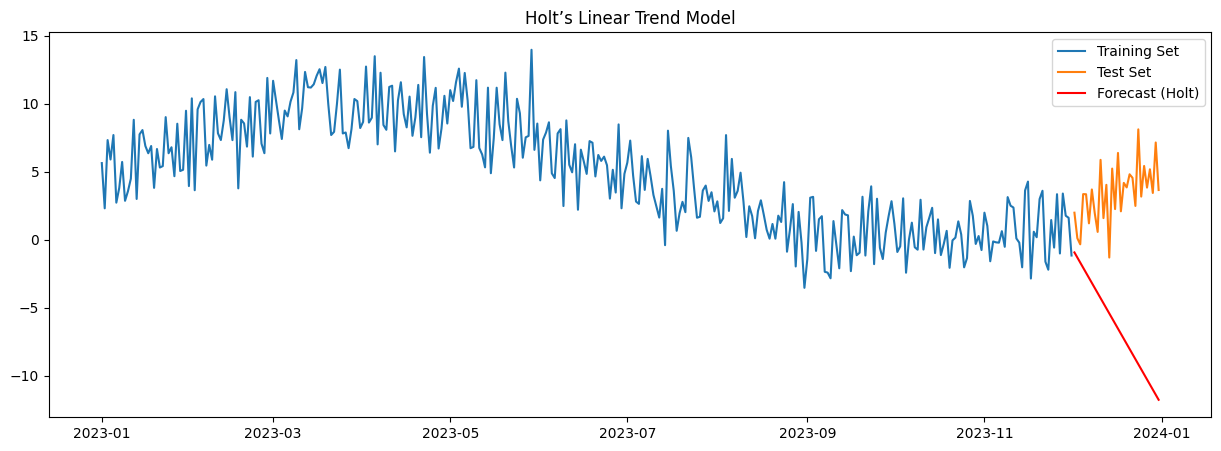

In [70]:
# Initialize and fit the model
model_holt = Holt(endog = train)
model_holt = model_holt.fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)

# Forecast future values
forecast_holt = model_holt.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(15,5))
plt.plot(train, label='Training Set')
plt.plot(test, label='Test Set')
plt.plot(forecast_holt, label='Forecast (Holt)', color='red')
plt.title('Holt’s Linear Trend Model')
plt.legend()
plt.show()

### c. **Holt-Winters (Triple Exponential Smoothing)** for Seasonal Data:
##### For data with both trend and seasonality, apply Holt-Winters (Triple Exponential Smoothing):

C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


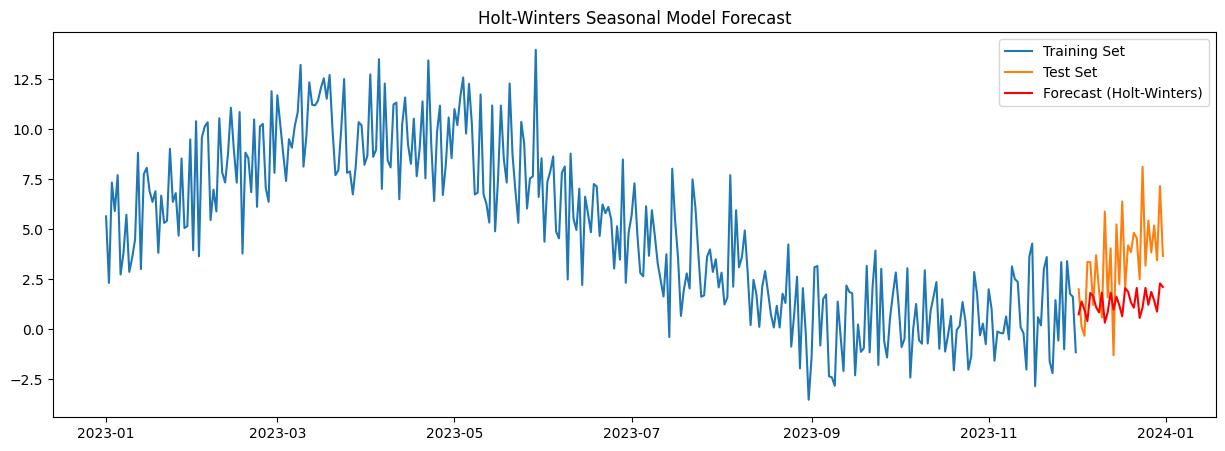

In [67]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters Seasonal Model
model_hw = ExponentialSmoothing(endog = train, trend='add', seasonal='add', seasonal_periods=12)
model_hw = model_hw.fit()
# Forecast future values
forecast_hw = model_hw.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(15,5))
plt.plot(train, label='Training Set')
plt.plot(test, label='Test Set')
plt.plot(forecast_hw, label='Forecast (Holt-Winters)', color='red')
plt.title('Holt-Winters Seasonal Model Forecast')
plt.legend()
plt.show()


# Evaluate the Model Performance

In [80]:
from sklearn.metrics import mean_squared_error

# Example of calculating Mean Squared Error
mse = mean_squared_error(test['temperature'], forecast_hw)  # assuming the last 10 values are held for testing
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 8.957159996800977


### d. Refine the Model
##### We can optimize the model further by enabling **optimized=True** when fitting, which will automatically select the optimal smoothing parameters:

C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


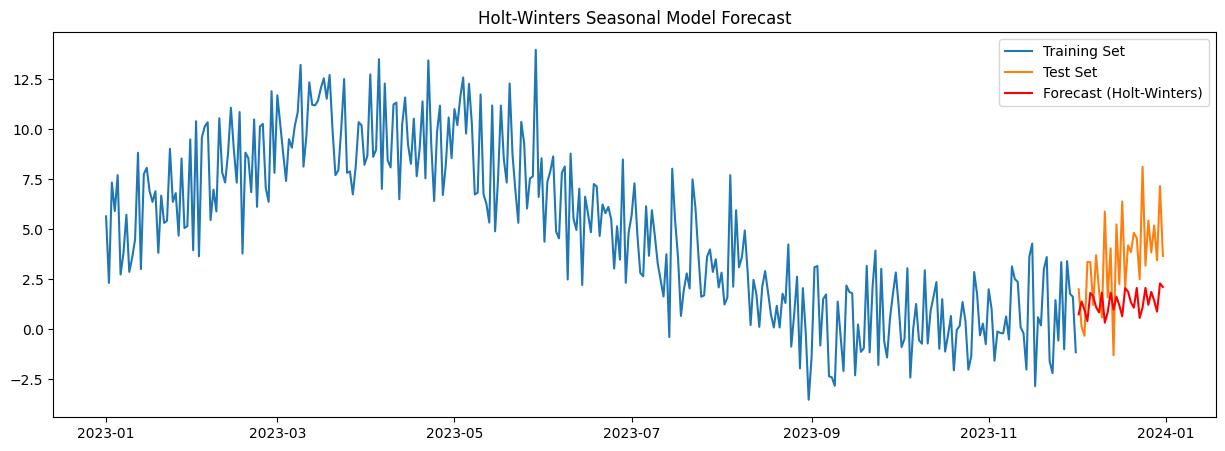

In [74]:
model_hw_optimized = ExponentialSmoothing(endog=train, trend='add', seasonal='add', seasonal_periods=12)
model_hw_optimized = model_hw_optimized.fit(optimized=True)
forecast_hw_optimized = model_hw_optimized.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(15,5))
plt.plot(train, label='Training Set')
plt.plot(test, label='Test Set')
plt.plot(forecast_hw, label='Forecast (Holt-Winters)', color='red')
plt.title('Holt-Winters Seasonal Model Forecast')
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error

# Example of calculating Mean Squared Error
mse = mean_squared_error(test['temperature'], forecast_hw_optimized)  # assuming the last 10 values are held for testing
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 8.957159996800977


# Exponential Smoothing (ETS, Holt-Winters) Model Using Class and functions

Missing values:  temperature    0
dtype: int64
The shape of the time series is:  (365, 1)
Training set shape: (335, 1), Test set shape: (30, 1)


C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


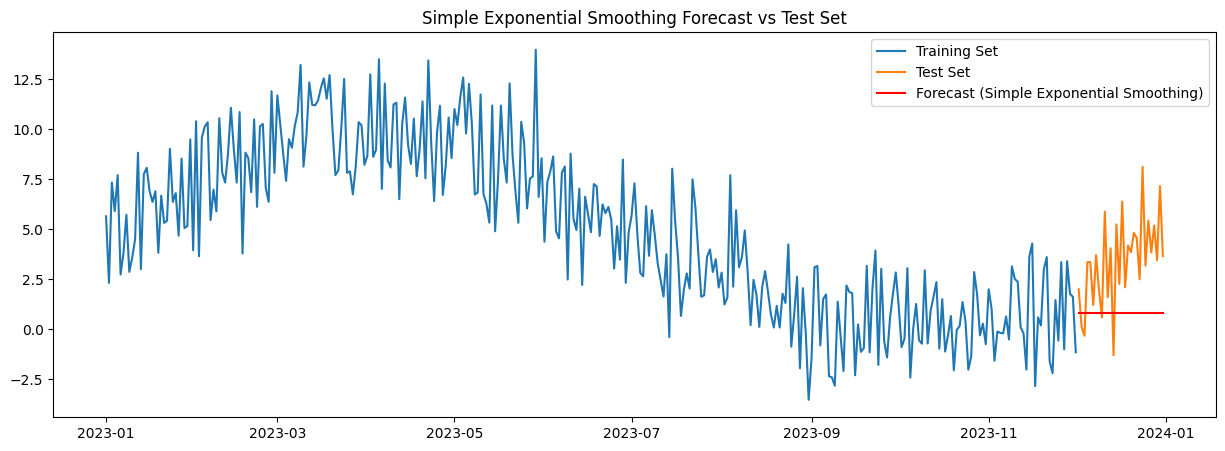

Simple Exponential Smoothing Mean Squared Error: 11.22


C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\xps\AppData\Local\Temp\ipykernel_6148\667467724.py:48: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = Holt(endog=self.train).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, optimized=False)


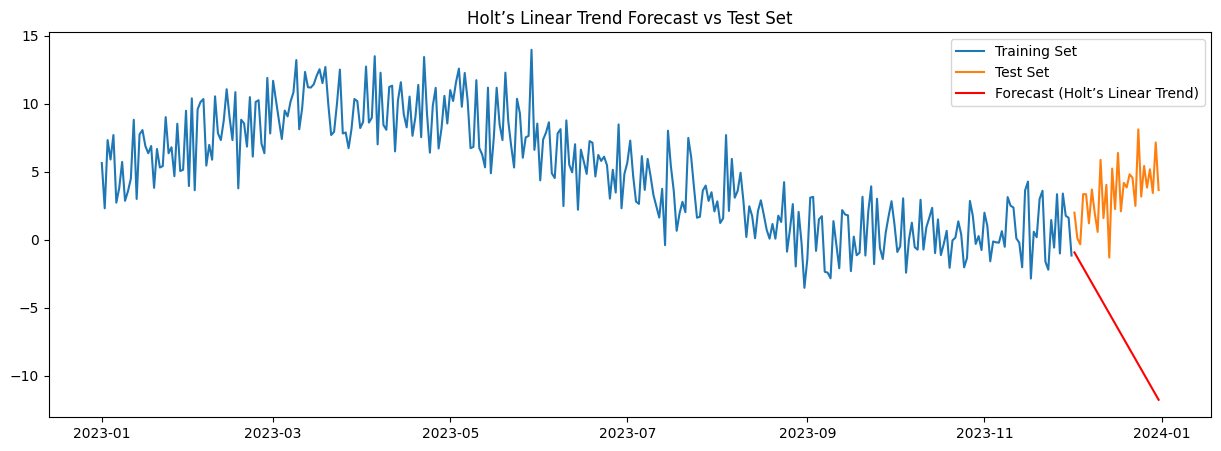

Holt’s Linear Trend Mean Squared Error: 117.42


C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


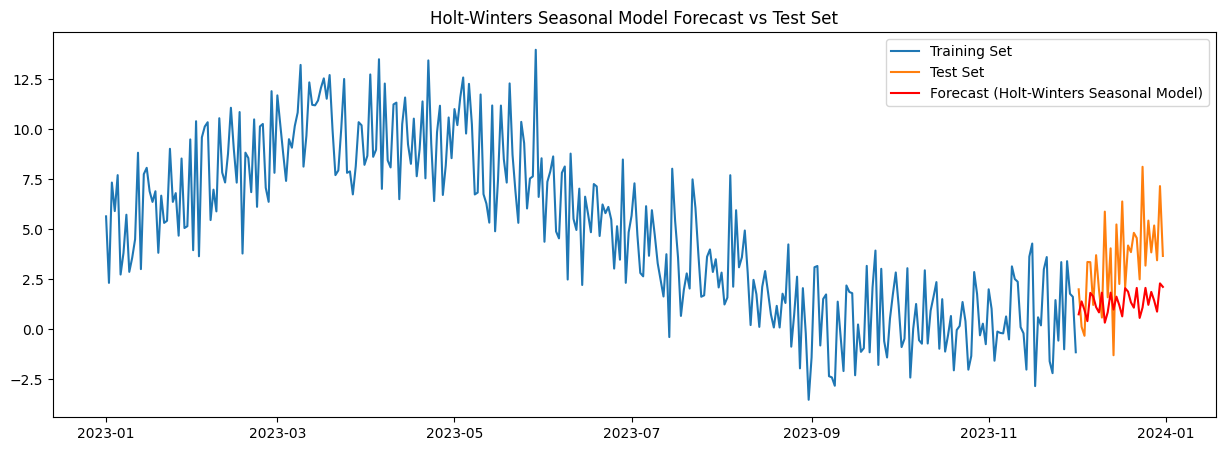

Holt-Winters Seasonal Model Mean Squared Error: 8.96


C:\Users\xps\anaconda3\envs\MLDL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


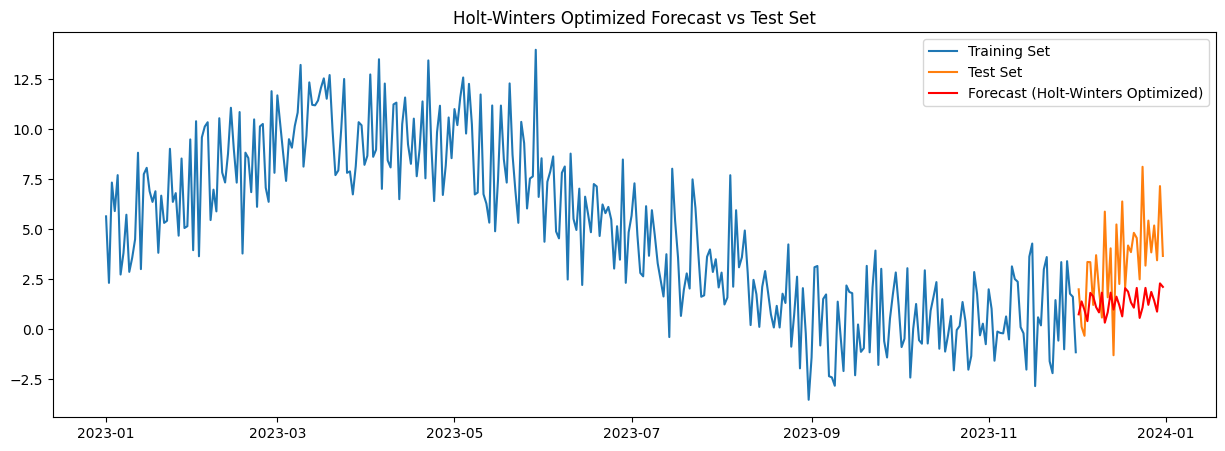

Holt-Winters Optimized Mean Squared Error: 8.96


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error

class TimeSeriesModel:
    def __init__(self, data_path):
        """Initialize the class by loading the dataset and handling missing values."""
        self.ts = pd.read_csv(data_path, index_col='date', parse_dates=True)
        self._preprocess_data()

    def _preprocess_data(self):
        """Handle missing data and split into training and test sets."""
        print("Missing values: ", self.ts.isnull().sum())
        self.ts.ffill(inplace=True)  # Forward fill missing values
        print("The shape of the time series is: ", self.ts.shape)

        # Splitting into train and test sets
        self.train = self.ts.iloc[:-30]
        self.test = self.ts.iloc[-30:]
        print(f"Training set shape: {self.train.shape}, Test set shape: {self.test.shape}")

    def plot_results(self, forecast, model_name):
        """Plot training, test set, and forecasted values."""
        plt.figure(figsize=(15, 5))
        plt.plot(self.train, label='Training Set')
        plt.plot(self.test, label='Test Set')
        plt.plot(forecast, label=f'Forecast ({model_name})', color='red')
        plt.title(f'{model_name} Forecast vs Test Set')
        plt.legend()
        plt.show()

    def evaluate_model(self, forecast, model_name):
        """Evaluate model performance using Mean Squared Error."""
        mse = mean_squared_error(self.test['temperature'], forecast)
        print(f'{model_name} Mean Squared Error: {mse:.2f}')
        return mse

    def simple_exponential_smoothing(self, smoothing_level=0.2):
        """Apply Simple Exponential Smoothing."""
        model = SimpleExpSmoothing(self.train).fit(smoothing_level=smoothing_level, optimized=False)
        forecast = model.forecast(steps=len(self.test))
        self.plot_results(forecast, "Simple Exponential Smoothing")
        return forecast

    def holt_linear_trend(self, smoothing_level=0.8, smoothing_slope=0.2):
        """Apply Holt’s Linear Trend Model."""
        model = Holt(endog=self.train).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, optimized=False)
        forecast = model.forecast(steps=len(self.test))
        self.plot_results(forecast, "Holt’s Linear Trend")
        return forecast

    def holt_winters(self, trend='add', seasonal='add', seasonal_periods=12):
        """Apply Holt-Winters (Triple Exponential Smoothing)."""
        model = ExponentialSmoothing(endog=self.train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods).fit()
        forecast = model.forecast(steps=len(self.test))
        self.plot_results(forecast, "Holt-Winters Seasonal Model")
        return forecast

    def holt_winters_optimized(self, trend='add', seasonal='add', seasonal_periods=12):
        """Apply Holt-Winters model with optimized parameters."""
        model = ExponentialSmoothing(endog=self.train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods).fit(optimized=True)
        forecast = model.forecast(steps=len(self.test))
        self.plot_results(forecast, "Holt-Winters Optimized")
        return forecast

# Usage of the TimeSeriesModel class

if __name__ == "__main__":
    # Initialize the model with the dataset
    model = TimeSeriesModel("luxembourg_temperature.csv")
    
    # Apply and evaluate Simple Exponential Smoothing
    forecast_ses = model.simple_exponential_smoothing()
    mse_ses = model.evaluate_model(forecast_ses, "Simple Exponential Smoothing")

    # Apply and evaluate Holt’s Linear Trend Model
    forecast_holt = model.holt_linear_trend()
    mse_holt = model.evaluate_model(forecast_holt, "Holt’s Linear Trend")

    # Apply and evaluate Holt-Winters Seasonal Model
    forecast_hw = model.holt_winters()
    mse_hw = model.evaluate_model(forecast_hw, "Holt-Winters Seasonal Model")

    # Apply and evaluate Holt-Winters with Optimized Parameters
    forecast_hw_optimized = model.holt_winters_optimized()
    mse_hw_optimized = model.evaluate_model(forecast_hw_optimized, "Holt-Winters Optimized")


The results of the Mean Squared Error (MSE) for different forecasting models provide insight into their respective performances when applied to the Luxembourg temperature dataset. Here's a breakdown of the results:

### 1. **Simple Exponential Smoothing (SES) MSE: 11.22**
   - **Simple Exponential Smoothing** is a model that applies exponential weights to the past data but **does not account for trends or seasonality**.
   - **Interpretation**: With an MSE of 11.22, this model shows a moderate level of error, suggesting that it performs reasonably but could be improved. The absence of trend and seasonal components makes it less suitable for temperature data, which often exhibits both. This MSE indicates that the model is not able to fully capture the complexity of the data.

### 2. **Holt’s Linear Trend MSE: 117.42**
   - **Holt’s Linear Trend** model extends SES by incorporating a trend component, making it more suited for data with a clear upward or downward trend.
   - **Interpretation**: An MSE of 117.42 is significantly higher than the other models, indicating that this model struggles to capture the structure of the temperature data. The poor performance could be due to the fact that the temperature data likely has strong seasonal patterns, which Holt's model doesn’t account for. This result highlights that while trends are important, neglecting seasonality can result in poor forecasting accuracy for this particular dataset.

### 3. **Holt-Winters Seasonal Model MSE: 8.96**
   - **Holt-Winters Seasonal Model** adds seasonal adjustments to Holt’s Linear Trend, making it effective for time series data with both trend and seasonal patterns (like temperature data).
   - **Interpretation**: With the lowest MSE of **8.96**, this model performs the best, effectively capturing both the trend and seasonal variations in the data. This shows that accounting for seasonality significantly improves the forecast accuracy for temperature data, as temperature typically follows yearly cycles.
   
### 4. **Holt-Winters Optimized MSE: 8.96**
   - The **Holt-Winters Optimized** model uses automatic parameter optimization to find the best smoothing factors for the trend and seasonality.
   - **Interpretation**: Despite using optimization, the MSE remains the same as the non-optimized version (**8.96**). This could indicate that the default settings of the non-optimized Holt-Winters model were already quite effective, or that the specific dataset and seasonal pattern are not particularly sensitive to further tuning. In other words, the optimized model did not add any significant improvement in this case.

---

### **General Insights**:
- **Holt-Winters Seasonal Model** (both regular and optimized) provides the most accurate results with an MSE of **8.96**, underscoring the importance of modeling both trend and seasonal components for time series like temperature data.
- **Simple Exponential Smoothing** performs moderately well with an MSE of **11.22**, but it lacks the capacity to handle the trend and seasonality, which makes it less suitable for temperature data.
- **Holt’s Linear Trend** has the highest error with an MSE of **117.42**, showing that ignoring seasonality leads to poor results, especially in datasets where periodic fluctuations are critical, such as temperature data.
  
### **Conclusions**:
- The **Holt-Winters Seasonal Model** is the most appropriate model for this temperature dataset, as it can effectively capture both trend and seasonal fluctuations.
- For datasets with clear seasonal patterns, including those components in the model (as Holt-Winters does) leads to a significant reduction in prediction error.


---
---
---
The **Holt-Winters Seasonal Model** is an extension of Holt’s linear trend model that accounts for both trend and seasonality in time series data. It’s particularly useful when data exhibits both a linear trend and a seasonal pattern, as in the case of temperature data, which often follows seasonal fluctuations.

### Interpretation of the MSE:
In this case, the **Mean Squared Error (MSE)** of the Holt-Winters Seasonal Model is **8.96**. Here's what it means:

1. **MSE Definition**:
   - MSE measures the average squared difference between the actual values and the predicted values. It quantifies how close the model's predictions are to the true values.
   - A lower MSE indicates better model performance, as it implies that the model's predictions are closer to the actual values.

2. **Contextual Significance of 8.96**:
   - An **MSE of 8.96** means that, on average, the squared differences between the predicted and actual temperatures are around 8.96 units (in squared degrees Celsius if we assume the temperature data is in Celsius).
   - For temperature forecasting, an MSE of 8.96 suggests that there is a moderate level of error in the model’s predictions. The error is not too high, but there is still room for improvement, especially if the model is expected to perform with high accuracy.

3. **Performance Assessment**:
   - **Reasonable Accuracy**: Given that temperature is naturally variable and the model has to account for both seasonal and trend components, this MSE suggests that the model captures the overall pattern relatively well. However, there might still be specific periods where the model's predictions deviate from actual values.
   - **Potential Improvements**: Although an MSE of 8.96 is not alarming, further refinements (e.g., tuning the smoothing parameters or adjusting the seasonal and trend components) could help reduce the error and improve accuracy.

4. **Comparison with Other Models**:
   - To fully evaluate the significance of an MSE of 8.96, it would be useful to compare it with the MSEs of other models (like Simple Exponential Smoothing or Holt’s Linear Trend).
   - If Holt-Winters outperforms the other models (i.e., it has a lower MSE), this would confirm that accounting for seasonality improves the prediction accuracy for the given temperature data.

### Conclusion:
The **Holt-Winters Seasonal Model** with an **MSE of 8.96** indicates that the model is performing reasonably well in capturing the temperature data's trend and seasonal components. While it isn't perfect, it provides a solid forecasting foundation, and further optimization could enhance the accuracy of the predictions.